<a href="https://colab.research.google.com/github/adiban17/PyTorch-Tutorial/blob/main/01_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Welcome to PyTorch workflow !")

Welcome to PyTorch workflow !


# PyTorch Workflow
Lets's explore an example PyTorch workflow

In [2]:
what_were_covering = {1:"data (prepare and load)",
                      2:"build model",
                      3:"fitting the model to data (training)",
                      4:"making predictions and evaluating a model (inference)",
                      5:"saving and loading a model",
                      6:"putting it all together"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [3]:
import torch
from torch import nn  # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np

# Check PyTorch version
torch.__version__

'2.9.0+cu126'

## 1. Data (preparing and loading)
Data can be anything... in machine learning.
* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data)
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some known data using the linear regression formula.
We'll use a linear regression formula to make a straight line with known **parameters**.

In [4]:
# create known parameters
weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
len(X), len(y)

(50, 50)

### Splitting the data into train and test splits (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data.


In [6]:
# create a train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data ?

This is where the data explorer's motto comes in !

"Visualize, visualize, visualize!"

In [7]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  # Are there predictions ?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", label="Predictions")

  # Show the legend
  plt.legend(prop={"size":14})

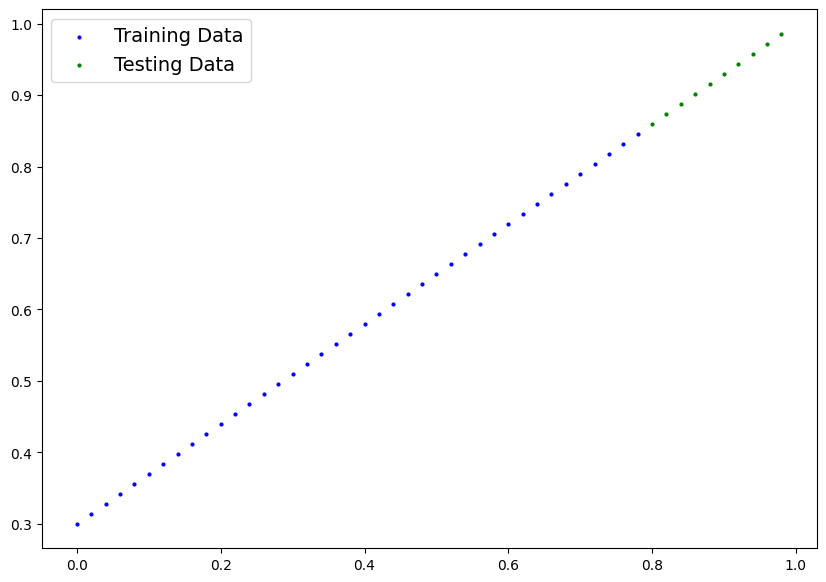

In [8]:
plot_predictions()

## 2. Build Model
Our first PyTorch model !

This is very exciting..let's do it !!!

What our model does :
* Start with random values (weights and bias)
* Look at training data and adjust the random values to better represent(or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so ?

It uses 2 algorithms:
1. Gradient Desecnt
2. Backpropagation

In [9]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is built from nn.Module (base class for a neural network modules)
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                             requires_grad=True,
                             dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self,x:torch.Tensor) -> torch.Tensor: #<- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula





### PyTorch model building essentials
* `torch.nn` - contains all of the buildings for computational graphs ( a neural network can be considered a computational graph)
* `torch.nn.Parameter` - what paramters should our model try and learn, often a PyTorch layer from `torch.nn` will set these for us
* `torch.nn.Module` - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* `torch.optim` - this where the optimizers in PyTorch live, they will help with gradient descent
* `def forward()` - All `nn.Module` subclasses require you to overwrite `forward()`, this method defines what happens in forward computation

### Checking the contents of our PyTorch model
Now we've created a model, let's see what's inside ...

So we can check model parameters or what's inside our model using `.paramters()`

In [10]:
# Create a random seed
torch.manual_seed(seed=42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the paramters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`
To check our model's predictive power, let's see how well it predicts `y_test` based on `x_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

In [12]:
# Making predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [13]:
y_preds_2 = model_0(X_test).detach().numpy()
y_preds_2

array([[0.3981617 ],
       [0.40489548],
       [0.41162932],
       [0.41836315],
       [0.42509693],
       [0.43183076],
       [0.43856454],
       [0.44529837],
       [0.45203215],
       [0.45876598]], dtype=float32)

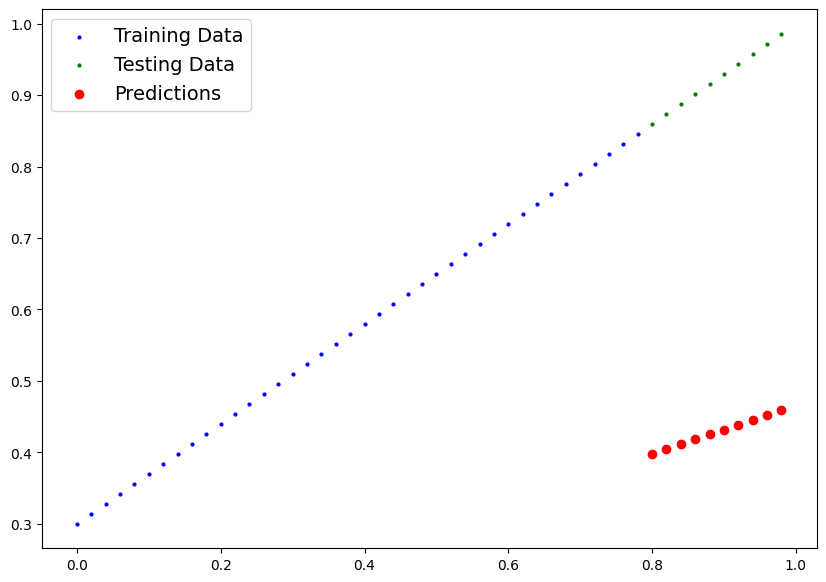

In [14]:
plot_predictions(predictions=y_preds_2)

## 3. Train model
The whole idea of training is for a model to move from some unknown paramters (these may be random) to some known parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your model's predictions are is to use a loss function.

* Note: Loss functio may also be called criterion in different areas. For our case, we're going to refer it as a loss function.

Things we need to train:
* **Loss Function**: A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer**: Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to improve the loss function.

    Inside the optimizer you'll have to set two parameters:
    * `params` - the model parameters you'll like to potimize, for example `params=model_0.parameters()`
    * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step ( a small `lr` results in small change, a large `lr` results in large changes)

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [15]:
# setup a loss function
loss_fn = nn.L1Loss()

# setting up an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)  # lr -> learning rate = possibly the most import hyperparamter that we can set

**Q**: WHich loss function and optimizer should I use ?

**A**: This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem (likeours, a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whether a photo is of a dog or a car, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss)

### Building a training loop (and a testing loop) in PyTorch
A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) - also called forward propagation
2. Calculate the loss (compare the forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters ofnour model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [16]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
# setting up a seed
torch.manual_seed(42)

# an epoch is one loop through the data...(this is a hyperparameter because we've set them)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

# Training
# 0. Loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # print(f"Loss:{loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()  # by default how the optimizer changes wil; accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  # Testing
  model_0.eval()  # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode():  # turns off gradient tracking & a couple more things behind the scenes
  # with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    pprint(f"Epoch:{epoch} | Loss:{loss} | Test Loss:{test_loss}")
    # print out the model weights and biases
    pprint(model_0.state_dict())

'Epoch:0 | Loss:0.31288138031959534 | Test Loss:0.35982614755630493'
OrderedDict({'weights': tensor([0.3757]), 'bias': tensor([0.2288])})
'Epoch:10 | Loss:0.025432366877794266 | Test Loss:0.05427704378962517'
OrderedDict({'weights': tensor([0.5898]), 'bias': tensor([0.3438])})
'Epoch:20 | Loss:0.039773717522621155 | Test Loss:0.11934101581573486'
OrderedDict({'weights': tensor([0.6122]), 'bias': tensor([0.2588])})
'Epoch:30 | Loss:0.039773717522621155 | Test Loss:0.11934101581573486'
OrderedDict({'weights': tensor([0.6122]), 'bias': tensor([0.2588])})
'Epoch:40 | Loss:0.039773717522621155 | Test Loss:0.11934101581573486'
OrderedDict({'weights': tensor([0.6122]), 'bias': tensor([0.2588])})
'Epoch:50 | Loss:0.039773717522621155 | Test Loss:0.11934101581573486'
OrderedDict({'weights': tensor([0.6122]), 'bias': tensor([0.2588])})
'Epoch:60 | Loss:0.039773717522621155 | Test Loss:0.11934101581573486'
OrderedDict({'weights': tensor([0.6122]), 'bias': tensor([0.2588])})
'Epoch:70 | Loss:0.039

/tmp/ipython-input-406978220.py:2: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")


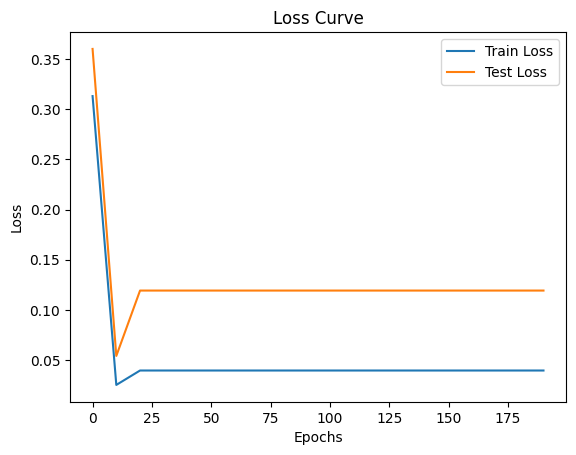

In [18]:
# plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [19]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6512])), ('bias', tensor([0.3588]))])

In [20]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

y_preds_new

tensor([[0.8798],
        [0.8928],
        [0.9058],
        [0.9188],
        [0.9319],
        [0.9449],
        [0.9579],
        [0.9709],
        [0.9840],
        [0.9970]])

In [21]:
weight, bias

(0.7, 0.3)

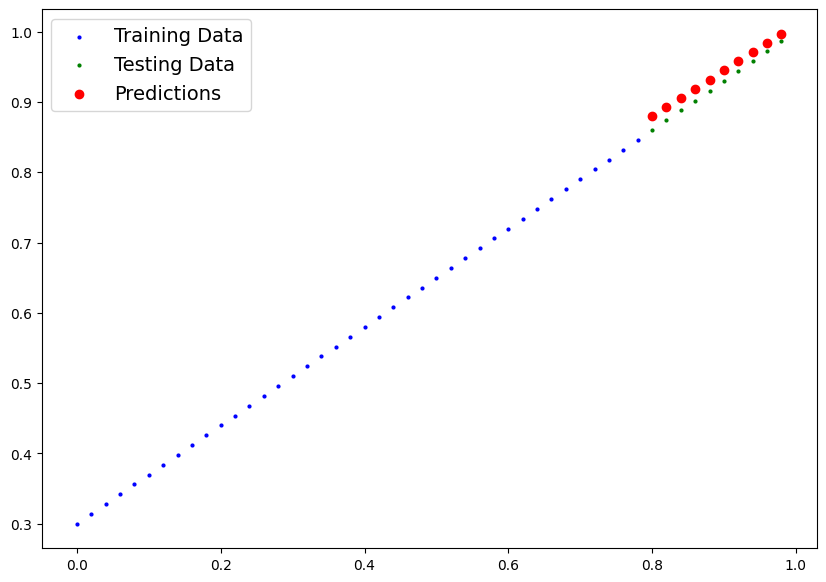

In [22]:
plot_predictions(predictions=y_preds_new)

### Saving a model in PyTorch
There are 3 main methods you should know about saving and loading models in PyTorch.
1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [23]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create a model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to:models/01_pytorch_workflow_model_0.pth


In [24]:
model_0

LinearRegressionModel()

In [25]:
!ls -1 models

01_pytorch_workflow_model_0.pth


## Loading a PyTorch model
Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that

In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6512])), ('bias', tensor([0.3588]))])

In [27]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with uploaded parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [28]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6512])), ('bias', tensor([0.3588]))])

In [29]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8798],
        [0.8928],
        [0.9058],
        [0.9188],
        [0.9319],
        [0.9449],
        [0.9579],
        [0.9709],
        [0.9840],
        [0.9970]])

In [30]:
# Compare loaded model preds woth original model preds
og_model_preds = model_0(X_test)
print(og_model_preds == loaded_model_preds)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])


## 6. Putting it all together
Let's go back through the steps above and see it all in one place

In [31]:
# import
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check pyTorch version
torch.__version__

'2.9.0+cu126'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will default to using CPU.

In [32]:
# setup device agnostic code
device = "cuda" if torch.cuda.is_available() == True else "cpu"
print(f"Using Device:{device}")

Using Device:cuda


In [33]:
!nvidia-smi

Sat Jan 17 19:30:13 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### 6.1 Data

In [34]:
# creating some synthetic data using the regression formula (y = m*x + c)
weight = 0.29837
bias = 12.210

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will pop up
y = weight * X + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[12.2100],
         [12.2160],
         [12.2219],
         [12.2279],
         [12.2339],
         [12.2398],
         [12.2458],
         [12.2518],
         [12.2577],
         [12.2637]]))

In [35]:
# split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
X_train.shape, X_test.shape

(torch.Size([40, 1]), torch.Size([10, 1]))

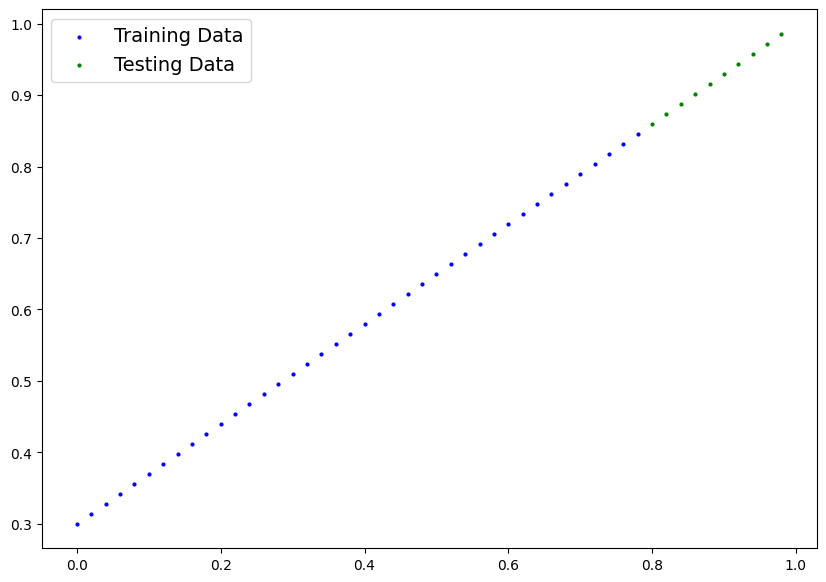

In [36]:
plot_predictions()

### 6.2 Building a PyTorch linear model

In [37]:
# create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [40]:
# check the model's current device
next(model_1.parameters()).device

device(type='cpu')

In [42]:
# set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training
For training we need :
* Loss function
* Optimizer
* Training Loop
* Testing Loop

In [43]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [51]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 20000

# device agnostic code for data
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for  epoch in range(epochs):
  model_1.train()

  # 1. Forward Pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    y_test_preds = model_1(X_test)
    test_loss = loss_fn(y_test_preds, y_test)

  # Print out what's happening
  print(f"Train Loss:{loss} | Test Loss:{test_loss}")





Streaming output truncated to the last 5000 lines.
Train Loss:0.004435420036315918 | Test Loss:0.005904579069465399
Train Loss:0.0070858001708984375 | Test Loss:0.007566547486931086
Train Loss:0.004435420036315918 | Test Loss:0.005904579069465399
Train Loss:0.0070858001708984375 | Test Loss:0.007566547486931086
Train Loss:0.004435420036315918 | Test Loss:0.005904579069465399
Train Loss:0.0070858001708984375 | Test Loss:0.007566547486931086
Train Loss:0.004435420036315918 | Test Loss:0.005904579069465399
Train Loss:0.0070858001708984375 | Test Loss:0.007566547486931086
Train Loss:0.004435420036315918 | Test Loss:0.005904579069465399
Train Loss:0.0070858001708984375 | Test Loss:0.007566547486931086
Train Loss:0.004435420036315918 | Test Loss:0.005904579069465399
Train Loss:0.0070858001708984375 | Test Loss:0.007566547486931086
Train Loss:0.004435420036315918 | Test Loss:0.005904579069465399
Train Loss:0.0070858001708984375 | Test Loss:0.007566547486931086
Train Loss:0.004435420036315918 

In [52]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3046]], device='cuda:0')),
             ('linear_layer.bias', tensor([12.2120], device='cuda:0'))])

In [59]:
def plot_predictions(train_data=X_train.cpu(),
                     train_labels=y_train.cpu(),
                     test_data=X_test.cpu(),
                     test_labels=y_test.cpu(),
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  # Are there predictions ?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", label="Predictions")

  # Show the legend
  plt.legend(prop={"size":14})

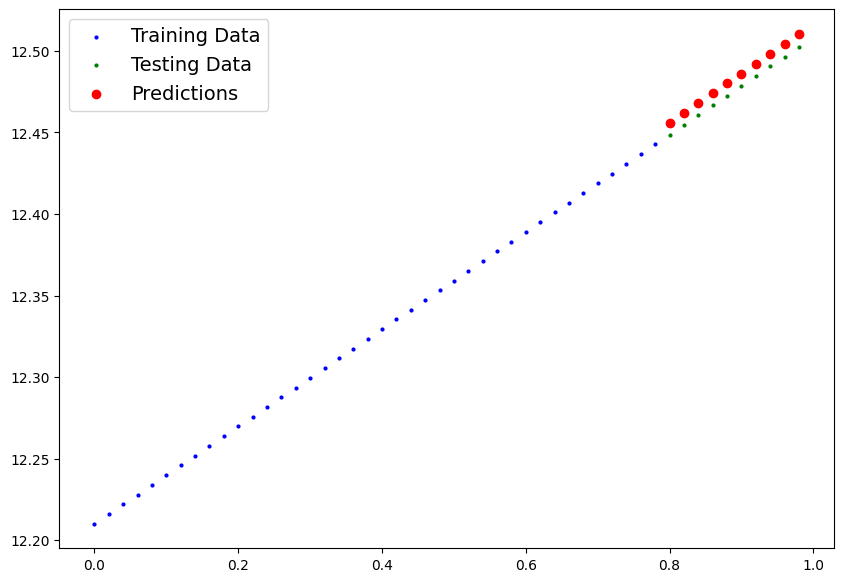

In [63]:
with torch.inference_mode():
  y_preds = model_1(X_test)

plot_predictions(predictions=y_preds.cpu())

### 6.4 Saving and Loading a trained model

In [64]:
from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to:models/01_pytorch_workflow_model_1.pth


In [65]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3046]], device='cuda:0')),
             ('linear_layer.bias', tensor([12.2120], device='cuda:0'))])

In [66]:
# Load a PyTorch Model

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# load the saved model to model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [69]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [70]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')